# Text Parsing

Here I will be writing the code to construct the fact strings given the code that Alistair has written.

In [51]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns
sns.set()

In [387]:
sdg_data = pd.read_csv("data/sdg_data.csv", encoding='ansi', low_memory=False)

In [284]:
selected_indicators = pd.read_csv("data/selected_indicators.csv", encoding = "ansi")

In [285]:
sdg_data.head()

,goal,priority,indicator_id,indicator_description,topic,series,country_code,location,age_group,sex,value_type,unit,year,value,country
0,8,110001,C080601,Proportion of youth (aged 15-24 years) not in ...,people,"Proportion of youth not in education, employme...",ALB,Total (national level),15 to 24 years old,Both sexes or no breakdown by sex,NaN,Percent,2011,0.3001,Albania
1,8,110001,C080601,Proportion of youth (aged 15-24 years) not in ...,people,"Proportion of youth not in education, employme...",ALB,Total (national level),15 to 24 years old,Female,NaN,Percent,2011,0.3252,Albania
2,8,110001,C080601,Proportion of youth (aged 15-24 years) not in ...,people,"Proportion of youth not in education, employme...",ALB,Total (national level),15 to 24 years old,Male,NaN,Percent,2011,0.2765,Albania
3,8,110001,C080601,Proportion of youth (aged 15-24 years) not in ...,people,"Proportion of youth not in education, employme...",ALB,Total (national level),15 to 24 years old,Both sexes or no breakdown by sex,NaN,Percent,2012,0.2680,Albania
4,8,110001,C080601,Proportion of youth (aged 15-24 years) not in ...,people,"Proportion of youth not in education, employme...",ALB,Total (national level),15 to 24 years old,Female,NaN,Percent,2012,0.2861,Albania


In [286]:
selected_indicators.head()

,goal,priority,indicator_id,topic,series,location,age_group,sex,value_type,unit,indicator_text,value_judgement
0,8,110001,C080601,people,"Proportion of youth not in education, employme...",Total (national level),15 to 24 years old,Both sexes or no breakdown by sex,NaN,Percent,of its people aged 15 to 24 were not in school...,bad
1,8,110001,C080601,working,"Proportion of youth not in education, employme...",Total (national level),15 to 24 years old,Both sexes or no breakdown by sex,NaN,Percent,of its people aged 15 to 24 were not in school...,bad
2,3,110311,C030702,girls,"Adolescent birth rate per 1,000 adolescent wom...",Total (national level),15 to 19 years old,Female,NaN,Percent,of its girls aged 15 to 19 became pregnant and...,good
3,3,110311,C030702,health,"Adolescent birth rate per 1,000 adolescent wom...",Total (national level),15 to 19 years old,Female,NaN,Percent,of its girls aged 15 to 19 became pregnant and...,good
4,4,110411,C040101,school,Proportion of children at the end of primary a...,Total (national level),All age ranges or no breakdown by age,Both sexes or no breakdown by sex,NaN,Percent,of its children have good maths skills by the ...,good


In [300]:
country_data = pd.read_csv("data/country_metadata.csv", encoding="ansi")

In [301]:
country_data.head()

,country_code,country,nickname,region_member_of,population,ethnicity,white,yellow,brown,black,male_name,female_name
0,AFG,Afghanistan,Afghanistan,Southern Asia,35000000,Afghanistan,1,1,97,1,Mohamed,Maryam
1,ALB,Albania,Albania,Southern Europe,2000000,Albania,97,1,1,1,Noel,Amelia
2,DZA,Algeria,Algeria,Northern Africa,41000000,Algeria,1,1,97,1,Mohamed,Fatima
3,ASM,American Samoa,American Samoa,Polynesia,60000,Samoa,1,1,97,1,Noah,Emma
4,AND,Andorra,Andorra,Southern Europe,80000,Andorra,94,1,4,1,Marc,Laia


In [302]:
', '.join(sorted(country_data.country_code.unique()))

'ABW, AFG, AGO, AIA, ALB, AND, ARE, ARG, ARM, ASM, ATG, AUS, AUT, AZE, BDI, BEL, BEN, BFA, BGD, BGR, BHM, BHR, BIH, BLR, BLZ, BMU, BOL, BRA, BRB, BRN, BTN, BWA, CAF, CAN, CHE, CHL, CHN, CIV, CMR, COD, COG, COK, COL, COM, CPV, CRI, CUB, CUW, CYM, CYP, CZE, DEU, DJI, DMA, DNK, DOM, DZA, ECU, EGY, ERI, ESP, EST, ETH, FIN, FJI, FLK, FRA, FRO, FSM, GAB, GBR, GEO, GHA, GIB, GIN, GMB, GNB, GNQ, GRC, GRD, GRL, GTM, GUM, GUY, HKG, HND, HRV, HTI, HUN, IDN, IMN, IND, IRL, IRN, IRQ, ISL, ISR, ITA, JAM, JOR, JPN, KAZ, KEN, KGZ, KHM, KIR, KNA, KOR, KWT, LAO, LBN, LBR, LBY, LCA, LIE, LKA, LSO, LTU, LUX, LVA, MAC, MAF, MAR, MCO, MDA, MDG, MDV, MEX, MHL, MKD, MLI, MLT, MMR, MNE, MNG, MNP, MOZ, MRT, MUS, MWI, MYS, NAM, NCL, NER, NGA, NIC, NIU, NLD, NOR, NPL, NZL, OMN, PAK, PAN, PER, PHL, PLW, PNG, POL, PRI, PRK, PRT, PRY, PYF, QAT, ROU, RUS, RWA, SAU, SDN, SEN, SGP, SLB, SLE, SLV, SMR, SOM, SPM, SRB, SSD, STP, SUR, SVK, SVN, SWE, SWZ, SXM, SYC, SYR, TCD, TGO, THA, TJK, TKM, TLS, TON, TTO, TUN, TUR, TUV,

In [303]:
import random

In [339]:
user_name = "Sam"
user_sex = "female"
user_country = country_data.country.sample().iloc[0]
user_country_nickname = country_data.loc[
                            country_data.country == user_country,
                            'nickname'].iloc[0]
target_country = country_data.country.sample().iloc[0]
target_country_nickname = country_data.loc[
                            country_data.country == target_country,
                            'nickname'].iloc[0]
target_topic = random.choice(sdg_data.topic.unique())
country_child_name = country_data.loc[country_data.country == target_country,
                                      user_sex + "_name"].iloc[0]
target_population = country_data.loc[country_data.country == target_country, 
                                     'population'].iloc[0]

print(user_country, target_country, target_topic, 
      country_child_name, target_population)

Cyprus Ghana power Fatoumata 28000000


In [340]:
indicator_selection = selected_indicators[selected_indicators.topic == target_topic]
indicator_selection = indicator_selection[indicator_selection.priority == indicator_selection.priority.min()]

In [341]:
indicator_selection

,goal,priority,indicator_id,topic,series,location,age_group,sex,value_type,unit,indicator_text,value_judgement
26,7,210721,C070101,power,Proportion of population with access to electr...,Total (national level),All age ranges or no breakdown by age,Both sexes or no breakdown by sex,NaN,Percent,of its people have access to electric power?,good


In [342]:
sdg_selection = (sdg_data[
    np.logical_and(
        sdg_data.country == target_country,
        sdg_data.topic == target_topic)])

In [343]:
sdg_selection = sdg_selection.merge(indicator_selection, 
    on = ['goal', 'priority', 'indicator_id', 'topic', 'series', 'location', 
          'age_group', 'unit', 'sex', 'value_type'],
    how = 'inner')

In [344]:
sdg_selection.head()

,goal,priority,indicator_id,indicator_description,topic,series,country_code,location,age_group,sex,value_type,unit,year,value,country,indicator_text,value_judgement
0,7,210721,C070101,Proportion of population with access to electr...,power,Proportion of population with access to electr...,GHA,Total (national level),All age ranges or no breakdown by age,Both sexes or no breakdown by sex,NaN,Percent,2000,0.4481,Ghana,of its people have access to electric power?,good
1,7,210721,C070101,Proportion of population with access to electr...,power,Proportion of population with access to electr...,GHA,Total (national level),All age ranges or no breakdown by age,Both sexes or no breakdown by sex,NaN,Percent,2001,0.4683,Ghana,of its people have access to electric power?,good
2,7,210721,C070101,Proportion of population with access to electr...,power,Proportion of population with access to electr...,GHA,Total (national level),All age ranges or no breakdown by age,Both sexes or no breakdown by sex,NaN,Percent,2002,0.4885,Ghana,of its people have access to electric power?,good
3,7,210721,C070101,Proportion of population with access to electr...,power,Proportion of population with access to electr...,GHA,Total (national level),All age ranges or no breakdown by age,Both sexes or no breakdown by sex,NaN,Percent,2003,0.4830,Ghana,of its people have access to electric power?,good
4,7,210721,C070101,Proportion of population with access to electr...,power,Proportion of population with access to electr...,GHA,Total (national level),All age ranges or no breakdown by age,Both sexes or no breakdown by sex,NaN,Percent,2004,0.5287,Ghana,of its people have access to electric power?,good


In [345]:
if len(sdg_selection) == 0:
    print("Hi {}, I am interested in {} too.".format(
            user_name, target_topic),
          "I hope that {} and {} can be friends.".format(
            user_country_nickname, target_country_nickname))
    

In [346]:
len(sdg_selection)

15

In [347]:
percent_desc = pd.DataFrame(
    {'lower_bound': [0.00, 0.05, 0.34, 0.68, 0.95, 1.00],
     'upper_bound': [0.05, 0.34, 0.68, 0.95, 1.00, np.infty],
     'text'  : ["almost none","some","about half",
                             "many","almost all", "all"]})

comparison_desc = pd.DataFrame(
    {'lower_bound': [-np.infty, -1.0, -0.2, -0.1, 0.1, 0.2, 1.0],
     'upper_bound': [-1, -0.2, -0.1,  0.1, 0.2, 1.0, np.infty],
     'text'  : ["very much lesser", "much lesser", "lesser", "about the same",
                                "greater", "much greater", "very much greater"]})

In [348]:
percent_desc

,lower_bound,text,upper_bound
0,0.00,almost none,0.050000
1,0.05,some,0.340000
2,0.34,about half,0.680000
3,0.68,many,0.950000
4,0.95,almost all,1.000000
5,1.00,all,inf


In [349]:
sdg_selection.year.min(), sdg_selection.value.min(),
sdg_selection.year.max(), sdg_selection.value.max()

(2014, 0.78299999999999992)

In [350]:
perc_text = percent_desc.loc[
    np.logical_and(
        sdg_selection.value.max() >= percent_desc.lower_bound,
        sdg_selection.value.max() < percent_desc.upper_bound),
    'text'].values[0]
print(perc_text)

many


In [351]:
comparison_desc

,lower_bound,text,upper_bound
0,-inf,very much lesser,-1.000000
1,-1.000000,much lesser,-0.200000
2,-0.200000,lesser,-0.100000
3,-0.100000,about the same,0.100000
4,0.100000,greater,0.200000
5,0.200000,much greater,1.000000
6,1.000000,very much greater,inf


In [375]:
comparison_text = comparison_desc.loc[
    np.logical_and(
        sdg_selection.value.max() >= comparison_desc.lower_bound,
        sdg_selection.value.max() < comparison_desc.upper_bound),
    'text'
].iloc[0]
print(comparison_text)

much greater


In [353]:
'Hi {}! My name is {}.'.format(user_name, country_child_name)

'Hi Sam! My name is Fatoumata.'

In [354]:
def millify(n):
    millnames = ['',' thousand',' million',' billion',' trillion']
    n = float(n)
    millidx = max(0,min(len(millnames)-1,
                        int(np.floor(0 if n == 0 else np.log10(abs(n))/3))))

    return '{:.0f}{}'.format(n / 10**(3 * millidx), millnames[millidx])

In [355]:
'{}, did you know that {} people live in Brazil?'.format(
    user_name,
    millify(
    country_data.loc[
        country_data.country == target_country, 
        'population'].values[0]))

'Sam, did you know that 28 million people live in Brazil?'

In [356]:
' '.join(
    ['{}, did you know that in {} in {:d},'.format(
        user_name, target_country, sdg_selection.year.max()),
     '{} ({:.1f}%) {}'.format(
        perc_text, 
        sdg_selection.loc[
            sdg_selection.year == sdg_selection.year.max(),
            'value'].values[0] * 100,
        indicator_selection.indicator_text.values[0]
        ),
     'This is {} as in {}'.format(
         comparison_text, sdg_selection.year.min())
    ]
)

'Sam, did you know that in Ghana in 2014, many (78.3%) of its people have access to electric power? This is much greater as in 2000'

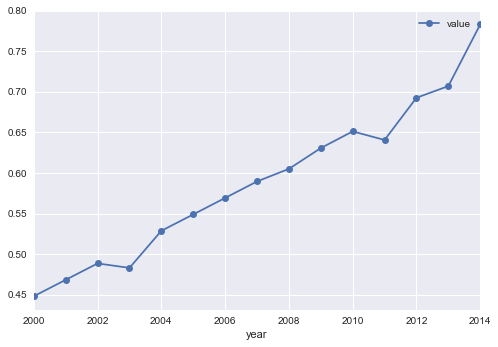

In [357]:
sdg_selection.plot(x='year', y='value', marker = 'o')

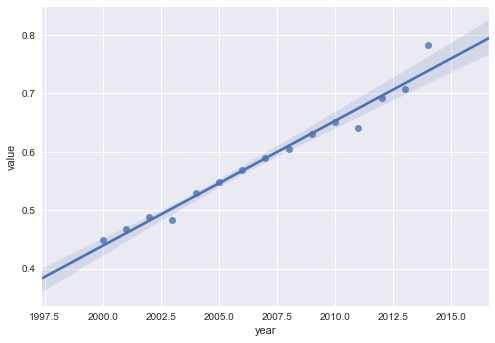

In [358]:
sns.regplot(x = 'year', y = 'value', data = sdg_selection)

In [363]:
sdg_countries_selection = sdg_data.merge(selected_indicators, 
    on = ['goal', 'priority', 'indicator_id', 'topic', 'series', 'location', 
          'age_group', 'unit', 'sex', 'value_type'],
    how = 'inner')

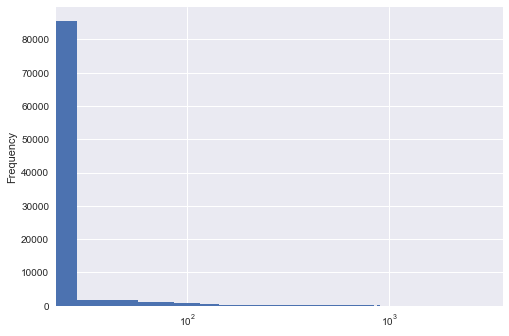

In [368]:
sdg_countries_selection.value.plot(kind = 'hist', bins=100, logx=True)

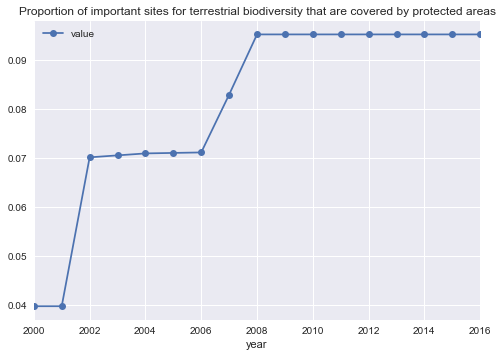

In [82]:
sdg_selection.plot(x = 'year', y = 'value', marker = 'o',
    title=sdg_selection.series.values[0])

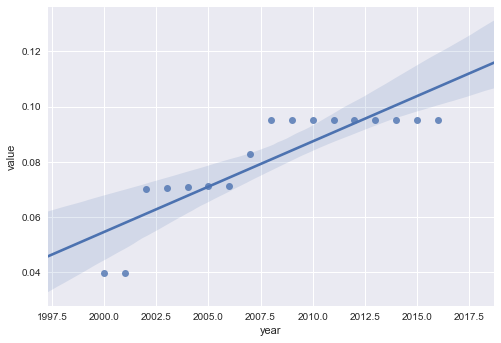

In [90]:
sns.regplot(x = 'year', y = 'value', data = sdg_selection)

In [384]:
country_data.loc[
	country_data.country == 'Cayman Islands', user_sex + "_name"]\
	.iloc[0]

'Emma'